In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Read the csv file
booking = pd.read_csv('hotel_bookings.csv')

In [3]:
#TO display all rows and columns

# pd.set_option('max_rows',None)
pd.set_option('max_columns',None)

#Outputs a few entries
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#Checking all columns of the dataset
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
booking.columns.values

array(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'], dtype=object)


It seems like there are some companies with missing values. 


All these columns seem to have a potential contribution to our EDA. So we keep them except for 'arrival_date_week_number'.


In [6]:
#Before doing any changes, we copy our dataset.
b_copy = booking.copy()

### Data Cleansing

In [7]:
# #Dropping columns
# b_copy.drop(['arrival_date_week_number', 'stays_in_weekend_nights','stays_in_week_nights','lead_time','company','days_in_waiting_list',
# 'market_segment','previous_cancellations','previous_bookings_not_canceled',],axis=1,inplace=True)

b_copy.drop('arrival_date_week_number',axis=1,inplace=True)


In [8]:
#We drop any duplicate rows
b_copy.drop_duplicates(keep=False,inplace=True)

In [9]:
#Resets the indeces of the dataframe
b_copy = b_copy.reset_index(drop=True)

#### Missing Values

In [10]:
#Checking for the columns that have missing values
b_copy.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             442
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11120
company                           74483
days_in_waiting_list                  0


In [19]:
#Calculate the % of missing values from each column
nan_columns = ['children','country','agent','company']
column_len = len(b_copy)

for column in nan_columns: #Loop calculates the the percentage of null values for each column
    null_count = b_copy[column].isnull().sum()
    null_size = null_count / column_len *100
    print('{} has {}% missing values.'.format(column,round(null_size,3))) #Prints the column name and % of null values
    
    if null_size >=30.0: #Checks if the null values are more than 30% of the data, and deletes the column if so
        print('\n')
        print("{} is dropped.".format(column))
        b_copy.drop([column],axis=1,inplace=True)



children has 0.005% missing values.
country has 0.558% missing values.
agent has 14.036% missing values.
company has 94.015% missing values.


company is dropped.


In [20]:
#Drop entries with missing values from 'children', 'country' columns
b_copy.dropna(subset=['children','country'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,0,2015,July,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79220,City Hotel,0,23,2017,August,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
79221,City Hotel,0,102,2017,August,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
79222,City Hotel,0,34,2017,August,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
79223,City Hotel,0,109,2017,August,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


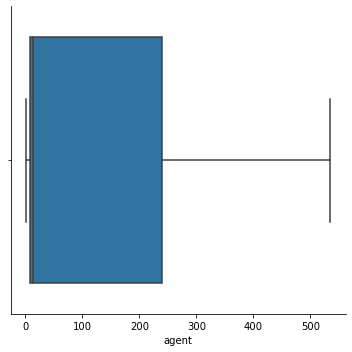

In [21]:
#b_copy['agent']
sns.catplot(x='agent',kind='box',data=b_copy)

In [22]:
b_copy['agent'].mode()

0    9.0
dtype: float64

In [23]:
b_copy['agent'].describe()

count    68105.000000
mean        95.692181
std        113.301185
min          1.000000
25%          9.000000
50%         14.000000
75%        240.000000
max        535.000000
Name: agent, dtype: float64

'agent' column has a mean of 95.692181, max of 535, min of 1, median of 14 and a mode of 9. Its standard deviation is 113.3011, which is very high.
This tells us that our data is very dispersed away from each other.

### Visualizing Data 

In [24]:
b_copy.columns.values

array(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'], dtype=object)

Text(0, 0.5, 'Count (units)')

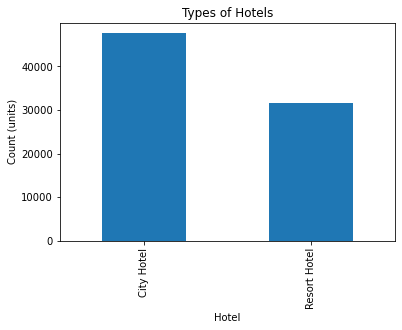

In [27]:
#Please note that this data is about hotel bookings.
hotels = b_copy['hotel'].value_counts()
hotels.plot.bar()
plt.title('Types of Hotels')
plt.xlabel('Hotel')
plt.ylabel('Count (units)')

There are higher bookings in the city hotel than the Resort.

Text(0, 0.5, 'Count (units)')

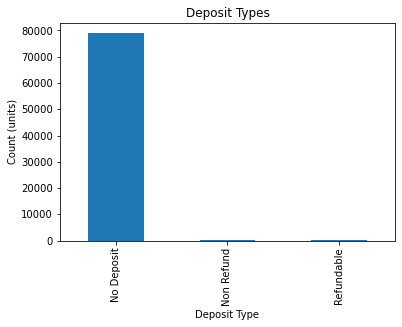

In [29]:
#Deposit Types
deposit_type = b_copy['deposit_type'].value_counts()

deposit_type.plot.bar()
plt.title('Deposit Types')
plt.xlabel('Deposit Type')
plt.ylabel('Count (units)')

In [106]:
b_copy['deposit_type'].value_counts()

No Deposit    78868
Non Refund      271
Refundable       86
Name: deposit_type, dtype: int64

The diagram above shows that most of the hotel bookings did not have deposits.

Text(0, 0.5, 'Count (units)')

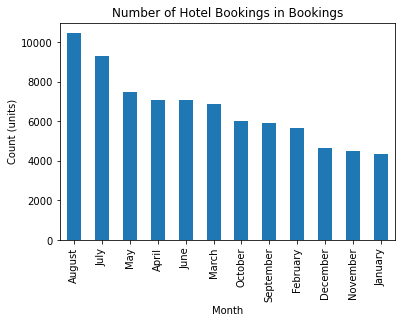

In [33]:
#Hotel Bookings in Months
month_count = b_copy['arrival_date_month'].value_counts()

month_count.plot.bar()
plt.title('Number of Hotel Bookings in Bookings')
plt.xlabel('Month')
plt.ylabel('Count (units)')

The diagram above shows that most of the hotel bookings take place around August, and we have least bookings at  January.


In [68]:

# df_deposit_customer = b_copy.groupby(['deposit_type','customer_type']).mean().reset_index(drop=False)

# #df_month.plot.bar(x='arrival_date_month',y='is_canceled')
# df_deposit_customer.head()

Text(0, 0.5, 'Count (units)')

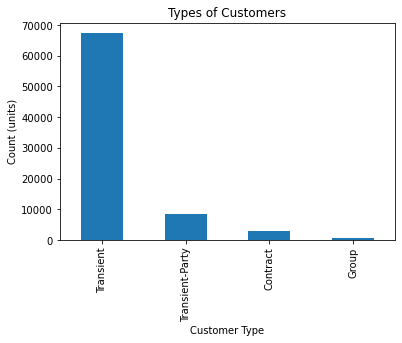

In [34]:
df_customer = b_copy['customer_type'].value_counts()

df_customer.plot.bar()
plt.title('Types of Customers')
plt.xlabel('Customer Type')
plt.ylabel('Count (units)')

Transient customers moslty book the hotel, customers in groups are the least to book.

In [70]:
b_copy.columns.values

array(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'], dtype=object)

In [71]:
b_copy['is_canceled'].value_counts()

0    58452
1    20773
Name: is_canceled, dtype: int64

Text(0, 0.5, 'Count (units)')

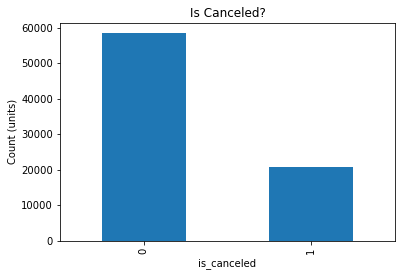

In [35]:
cancel_ = b_copy['is_canceled'].value_counts()
cancel_.plot.bar()
plt.title('Is Canceled?')
plt.xlabel('is_canceled')
plt.ylabel('Count (units)')

Assuming that '0' means False i.e. the booking is not canceled, and '1' means True i.e. the booking is canceled,
Around 60 000 bookings were not canceled, while around 20 773 bookings were canceled.

In [37]:
hotel = b_copy.groupby('hotel').mean().reset_index(drop=False)
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,0.286558,72.120024,2016.270649,15.729751,0.885020,2.297297,1.887920,0.144373,0.008238,0.034635,0.031882,0.212896,0.258249,21.831362,0.644571,112.564402,0.039427,0.734669
1,Resort Hotel,0.225579,80.795689,2016.142875,15.903928,1.220839,3.186708,1.881743,0.158013,0.017413,0.053092,0.017192,0.184369,0.317574,218.557646,0.262523,100.495582,0.170685,0.687166


Text(0, 0.5, 'Count (units)')

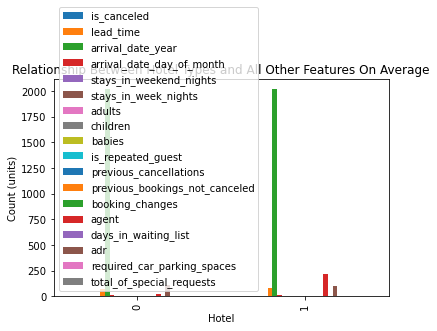

In [39]:
hotel.plot.bar()
plt.title('Relationship Between Hotel Types and All Other Features On Average')
plt.xlabel('Hotel')
plt.ylabel('Count (units)')

Assuming that '0' : City Hotel and '1' : Resort Hotel, City Hotel has the highest average of bookings not canceled.
        

Text(0.5, 1.0, 'Number of Adults That Book Hotels (units)')

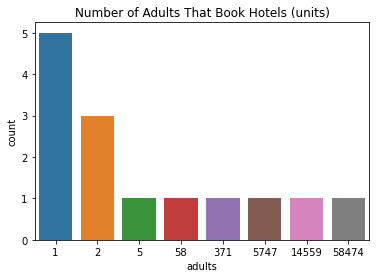

In [42]:
num_adults = b_copy['adults'].value_counts()

sns.countplot(num_adults)
plt.title('Number of Adults That Book Hotels (units)')

The graph above shows that the hotels are mostly occupied by 1 adult, it is unusual to have 5 adults in a hotel.

In [83]:
b_copy.columns.values

array(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'], dtype=object)

Text(0, 0.5, 'Count (units)')

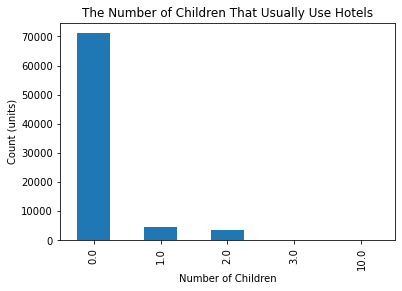

In [44]:
children_count = b_copy['children'].value_counts()

#sns.countplot(children_count)
children_count.plot.bar()
plt.title('The Number of Children That Usually Use Hotels')
plt.xlabel('Number of Children')
plt.ylabel('Count (units)')

The diagram shows that aboe 70 000 hotel bookings are not meant for children, it is quite rare to find bookings meant for children.


Text(0, 0.5, 'Count (units)')

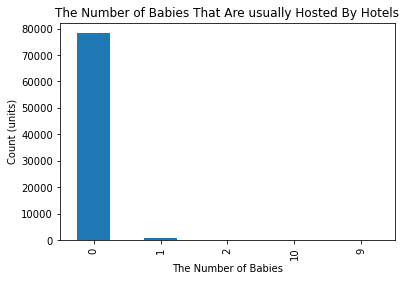

In [45]:
babies = b_copy['babies'].value_counts()
babies.plot.bar()
plt.title('The Number of Babies That Are usually Hosted By Hotels')
plt.xlabel('The Number of Babies')
plt.ylabel('Count (units)')

In [89]:
b_copy['babies'].value_counts()

0     78314
1       894
2        15
10        1
9         1
Name: babies, dtype: int64

The diagram above shows that more than 70000 hotel bookings are not for babies, it is very rare to find bookings for babies as well.


Text(0, 0.5, 'Number Of Times Each Meal Is Ordered (units)')

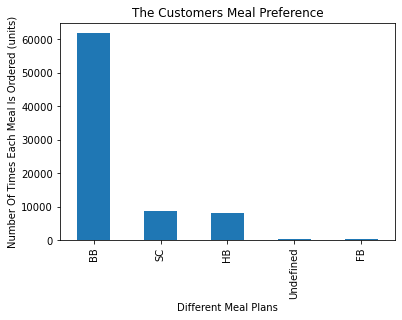

In [46]:
meals = b_copy['meal'].value_counts()
meals.plot.bar()
plt.title('The Customers Meal Preference')
plt.xlabel('Different Meal Plans')
plt.ylabel('Number Of Times Each Meal Is Ordered (units)')

The diagram shows that the meal mostly chosen is BB, and FB is the least prefered.

Text(0, 0.5, 'Lead_time')

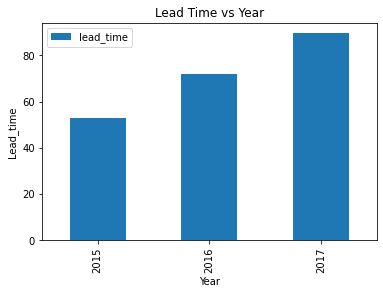

In [47]:
df_year = b_copy.groupby('arrival_date_year').mean()
df_year = df_year.sort_values('lead_time').reset_index(drop=False)

df_year.plot.bar(x='arrival_date_year',y='lead_time')
plt.title('Lead Time vs Year')
plt.xlabel('Year')
plt.ylabel('Lead_time')

Lead time is the number of days that elapsed between the entering date of the booking into the PMS and the arrival date

So on average, hotel bookings were done earlier in 2017 than in any other year. Lots of factors could influence such decision e.g.
more people are able to afford hotel outings etc.


In [96]:

# week_nights = b_copy['stays_in_week_nights'].value_counts()
# week_nights